In [9]:
# ! cd /Users/ruttenv/Documents/projects/nmfx/

In [10]:
!pwd

/groups/ahrens/home/ruttenv/python_packages/nmfx/notebooks


In [11]:
path = '/Users/ruttenv/Documents/projects/nmfx/'
path = '/groups/ahrens/home/ruttenv/python_packages/nmfx/'
import sys
sys.path.append(path)

In [12]:
from nmfx import initialize
import matplotlib.pyplot as pl
from importlib import reload
import numpy as np
from nmfx.kernels import build_K, sample_from_K
from nmfx import losses
from nmfx.utils import log1pexp
from nmfx.parameters import Parameters
import nmfx
from nmfx import kernels
import os
np.random.seed(0)
reload(kernels)
reload(nmfx)

<module 'nmfx' from '/groups/ahrens/home/ruttenv/python_packages/nmfx/nmfx/__init__.py'>

In [13]:
np.random.seed(0)
t = 100
k = 5
coords_dim = 3
dim = 30

def generate_toy_data(dim, k, t):
    xv, yv = np.meshgrid(np.arange(dim)/dim, np.arange(dim)/dim)
    coords = np.vstack([xv.flatten()[None], yv.flatten()[None]]).T
    taus = np.linspace(0.001, 0.2, k)[::-1]
    dist = ((coords[None]-coords[:,None])**2).sum(-1)
    dist_coef = [np.exp(-dist/tau) + np.diag(np.arange(dim*dim))*1e-4 for tau in taus]
    Wkd = log1pexp(np.array([np.random.multivariate_normal(np.zeros(dim*dim), K, size = 1) for K in dist_coef])).squeeze()
    H = log1pexp(np.random.randn(t, k))
    X = H@Wkd
    return X, H, Wkd, taus, coords

X, H, Wkd, taus, coordinates = generate_toy_data(dim, k, t)

In [14]:
# X.min(), X.max(), H.min(), H.max(), Wkd.min(), Wkd.max()
taus

array([0.2    , 0.15025, 0.1005 , 0.05075, 0.001  ])

In [15]:
initial_values = {}
initial_values['H'] = H
initial_values['W'] = Wkd

parameters = Parameters()
parameters.batch_size = t
parameters.max_iter = 100
parameters.l2_space = 1.0
parameters.l1_W = 0
save_path = '/nrs/ahrens/Virginia_nrs/nmf_test/'
os.makedirs(save_path, exist_ok=True)
save_iter = 100

In [16]:
reload(nmfx)
H, W, log = nmfx.nmf(X, k, parameters,\
                     taus = taus, \
                     coordinates = coordinates,\
                     save_path = save_path, \
                     save_iter = save_iter, \
                     initial_values = initial_values)

H & W initialized with given initial values
total batch num: 1
compiling update function
Iteration 0, loss=451.7769165039, h_diff=nan, grad_norm=nan, time=0.0007min
log1pexp
nan nan
intermediate results saved
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
Iteration 20, loss=nan, h_diff=nan, grad_norm=nan, time=0.01min
log1pexp
nan nan
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
compiling update function
compilin

NameError: name 'x' is not defined

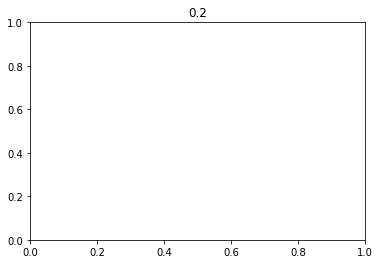

In [17]:
for ind in range(k):
    pl.figure()
    pl.title(taus[ind])
    pl.imshow(x[ind])

In [ ]:

pl.imshow(x.reshape([dim, dim]))

In [ ]:
pl.imshow(dist_coef[0])

In [ ]:
x = kernels.sample_from_K(K[0])
x

In [ ]:
pl.imshow(x.reshape([dim, dim]))


In [ ]:
from nmfx.utils.